# Healthcare Marketing Analytics Project
## Determining the impact of R&D Ration on Healthcare Firms' Value

In [113]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter("once")

### Data Sourcing
This dataset was provided by Bocconi University, Marketing Analytics department. Here is the description of the data columns in the dataset:
- Firm ID (variable name: id)
- Year (variable name: year)
- Firm Total Assets (unit: million $) (variable name: assets)
- Long-term Debt (unit: million $) (variable name: debt)
- Earnings (unit: million $): This variable is EBITDA (earnings before interest, taxes, depreciation,
and amortization). (variable name: earnings)
- Cash Flows (unit: million $): This is Net Cash Flow from Operating Activity. However, please
conceptually consider this variable a proxy for profit based on only cash as some academic
studies do. (variable name: cashflow)
- Sales (unit: million $) (variable name: sales)
- Advertising Expenditure (unit: million $): Conceptually, you can consider this variable as a firm’s
brand building effort. (variable name: ad)
- R&D Expenditure (unit: million $): Conceptually, you can consider this variable as a firm’s
innovation effort. (variable name: rd)
- Marketing, Selling, and Operating Expenditure (unit: million $): Conceptually, you can consider
this variable as a firm’s selling and marketing effort (e.g., sale forces, customer management)
except advertising. Note that this variable does not include advertising expenditure and R&D
expenditure. (variable name: mkt)
- Product Market Threat: Consider this variable as competitive threats that a firm goes through in
its product markets. Higher values indicate higher levels of competitive threats. (variable name:
threat)
- 2001 Recession (dummy): 1 if the observation is in the year of 2001 recession and 0 otherwise.
(variable name: rec1)
- 2008 Recession (dummy): 1 if the observation is in the year of 2008 recession and 0 otherwise.
(variable name: rec2)
- Firm Value (i.e., Tobin’s Q) (variable name: fv)
- Market Valuation (unit: million $): Market value of a firm (variable name: mv)
- Business sector where a firm operates (indicator) (variable name: sector)
    - 1: Manufacturing (Consumer Durables and Non-Durables) e.g., Food, Tobacco, Textile, Apparel, Toys, Cars, TVs, Furniture, Appliances
    - 2: Manufacturing (Non-Consumer Goods) e.g., Machinery, Office Furniture, Paper, Computers, Electronic Equipment
    - 3: Wholesale
    - 4: Retailing
    - 5: Healthcare e.g., healthcare, medical equipment, drugs
    - 6: Information Technology e.g., software publishers, telecommunications, web search portals
    - 7: Service Sector (Technical Services, Professional and Administrative Services, and Education Services)
    - 8: Entertainment, Accommodation, and Full Service Restaurants

In [114]:
all_data = pd.read_csv('marketing_insight.csv')
all_data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,sector
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,5
1,2607,1993,18.897,0.716,-2.458,-2.016,26.274,10.802283,0.748,1.310,18.0228,0.083362,0,0,5.405,1
2,1204,1993,37.476,23.735,4.359,-0.087,63.938,29.856251,0.759,0.542,1.0184,1.225564,0,0,9.997,3
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,5
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,5


In [115]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22723 entries, 0 to 22722
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        22723 non-null  int64  
 1   year      22723 non-null  int64  
 2   assets    22723 non-null  float64
 3   debt      22723 non-null  float64
 4   earnings  22723 non-null  float64
 5   cashflow  22723 non-null  float64
 6   sales     22723 non-null  float64
 7   mv        22723 non-null  float64
 8   ad        22723 non-null  float64
 9   rd        22723 non-null  float64
 10  threat    22723 non-null  float64
 11  fv        22723 non-null  float64
 12  rec1      22723 non-null  int64  
 13  rec2      22723 non-null  int64  
 14  mkt       22723 non-null  float64
 15  sector    22723 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 2.8 MB


#### Filtering out the Healthcare Sector
This project will be focused on the Healthcare sector, therefore, we'll filter out other sectors to remain with **sector 5** – ***Healthcare***.

In [116]:
data = all_data[all_data['sector']==5] #Filtering out all sectors to remain with healthcare data
data = data.drop(['sector'], axis=1) #Delete the sector column as it is no longer relevant
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292 entries, 0 to 22569
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3292 non-null   int64  
 1   year      3292 non-null   int64  
 2   assets    3292 non-null   float64
 3   debt      3292 non-null   float64
 4   earnings  3292 non-null   float64
 5   cashflow  3292 non-null   float64
 6   sales     3292 non-null   float64
 7   mv        3292 non-null   float64
 8   ad        3292 non-null   float64
 9   rd        3292 non-null   float64
 10  threat    3292 non-null   float64
 11  fv        3292 non-null   float64
 12  rec1      3292 non-null   int64  
 13  rec2      3292 non-null   int64  
 14  mkt       3292 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 411.5 KB


In [118]:
data.describe()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,1724.311665,2007.315614,3429.609149,775.250014,563.978191,418.321345,1706.000846,6780.085848,71.307075,255.238051,8.154948,2.360336,0.034933,0.045261,408.670110
std,1058.535967,7.179453,16334.438091,3832.730215,2663.596820,2038.262931,7211.308404,29286.544040,354.174284,1154.296713,11.103680,2.746864,0.183638,0.207908,1715.608140
min,1.000000,1993.000000,0.404000,0.000000,-666.676000,-635.442000,0.000000,0.809150,0.000000,0.000000,1.000000,-0.586277,0.000000,0.000000,-1895.591100
25%,774.000000,2002.000000,34.815250,0.000000,-5.244250,-4.947750,26.508250,52.787131,0.288000,1.748750,1.294500,0.861938,0.000000,0.000000,12.847250
50%,1584.000000,2007.000000,109.109000,1.957500,4.940000,3.104500,84.768000,207.849600,1.103000,6.816000,3.197450,1.604317,0.000000,0.000000,34.998501
75%,2629.000000,2013.000000,495.226000,65.151500,58.128250,39.787500,354.252500,1014.843800,6.500000,30.600500,10.694725,2.901638,0.000000,0.000000,119.889250
max,3523.000000,2019.000000,212949.000000,63226.000000,28795.000000,23416.000000,82059.000000,384003.780000,4000.000000,12245.000000,85.363701,45.089115,1.000000,1.000000,19088.000000


#### Generating Additional Variables
Here are varaiables we are generating:
- ***Firm Value (fv):*** Firm Market Value/Firm log assets
- ***R&D Ratio (rd_ratio):*** R&D Expenditure/Sales 
- ***Strategic Emphasis (se):*** (Advertising Expenditure - R&D Expenditure)/Firm Total Assets
- ***Advertising Ratio (ad_ratio):*** Advertising Expenditure/Sales
- ***Log assets (log_assets):*** Natural logarithm of Asstes
- ***Market Share (mkt_share):*** Firm Sales/Total Sales in the market * 100
- ***Market Growth (mkt_growth):*** Total Market sales year t/ Total Market sales yeat t-1 * 100

**Note:** We'll drop instances where Sales and Assets is equal to 0 first, as this will output infinite values for RD_RATIO, AD_RATIO and SE. However, we are positive from the data summary that there are no firms with Assets as 0 (min value was 0.404000)

In [119]:
#Generate R&D Ratio
data['rd_ratio'] = data['rd']/data['sales']
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,rd_ratio
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,0.084488
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,0.380521
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,0.008645
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,inf
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,0.028223


In [120]:
#Generate Strategic Emphasis
data['se'] = (data['ad'] - data['rd'])/data['assets']
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,rd_ratio,se
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,0.084488,-0.056300
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,0.380521,-0.162903
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,0.008645,0.014166
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,inf,-0.397639
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,0.028223,-0.018478


In [121]:
#Generate Advertising Ratio
data['ad_ratio'] = data['ad']/data['sales']
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,0.084488,-0.056300,0.020499
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,0.380521,-0.162903,0.143227
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,0.008645,0.014166,0.016709
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,inf,-0.397639,NaN
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,0.028223,-0.018478,0.012321


In [122]:
#Generate log assets
data['log_assets'] = np.log(data['assets'])
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,0.084488,-0.056300,0.020499,1.411718
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,0.380521,-0.162903,0.143227,2.064582
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,0.008645,0.014166,0.016709,3.198510
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,inf,-0.397639,NaN,2.327083
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,0.028223,-0.018478,0.012321,1.792925


In [123]:
#Generate Market share
data['mkt_share'] = data['sales']/np.sum(data['sales'])*100
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,threat,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets,mkt_share
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,1.7482,14.836461,0,0,2.042,0.084488,-0.056300,0.020499,1.411718,0.000064
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,9.1024,6.930602,0,0,6.089,0.380521,-0.162903,0.143227,2.064582,0.000096
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,1.0658,7.952849,0,0,9.994,0.008645,0.014166,0.016709,3.198510,0.000766
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,5.0967,2.646077,0,0,11.487,inf,-0.397639,NaN,2.327083,0.000000
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,1.0549,3.027747,0,0,1.558,0.028223,-0.018478,0.012321,1.792925,0.000124


,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,...,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets,mkt_share,mkt_growth
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,...,14.836461,0,0,2.042,0.084488,-0.056300,0.020499,1.411718,0.000064,0
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,...,6.930602,0,0,6.089,0.380521,-0.162903,0.143227,2.064582,0.000096,0
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,...,7.952849,0,0,9.994,0.008645,0.014166,0.016709,3.198510,0.000766,0
10,1312,1993,10.248,0.000,-15.562,-9.349,0.000,23.978001,0.000,4.075,...,2.646077,0,0,11.487,inf,-0.397639,NaN,2.327083,0.000000,0
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,...,3.027747,0,0,1.558,0.028223,-0.018478,0.012321,1.792925,0.000124,0


In [130]:
#Generate Market growth
data['mkt_growth'] = 0

for year in data.year.unique()[1:]:
    current = np.sum(data['sales'] * np.equal(data['year'],year))
    past = np.sum(data['sales'] * np.equal(data['year'],year-1))
    growth = (current-past)/past
    data.at[data['year'] == year, 'mkt_growth'] = growth
    
data

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,...,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets,mkt_share,mkt_growth
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305000,...,45.103896,0,0,2.042000,0.084488,-0.056300,0.020499,1.411718,0.000064,0.000000
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059000,...,28.288539,0,0,6.089000,0.380521,-0.162903,0.143227,2.064582,0.000096,0.000000
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372000,...,65.050605,0,0,9.994000,0.008645,0.014166,0.016709,3.198510,0.000766,0.000000
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197000,...,11.122982,0,0,1.558000,0.028223,-0.018478,0.012321,1.792925,0.000124,0.000000
23,214,1993,17.609,7.213,-7.784,-9.292,8.150,132.936000,0.600,5.291000,...,46.344837,0,0,5.462000,0.649202,-0.266398,0.073620,2.868410,0.000145,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22528,1257,2007,21.649,0.060,0.426,1.256,31.432,41.248550,0.062,2.275000,...,13.414340,0,0,9.481000,0.072378,-0.102222,0.001973,3.074959,0.000560,0.072662
22531,3382,2007,327.165,0.727,16.362,-9.093,232.810,972.894840,0.300,34.304001,...,168.016714,0,0,42.007000,0.147348,-0.103935,0.001289,5.790465,0.004145,0.072662
22544,3382,2008,295.932,0.594,-30.705,-36.164,204.589,123.912320,0.200,42.556999,...,21.776713,0,1,46.136002,0.208012,-0.143131,0.000978,5.690130,0.003643,0.035270
22562,3382,2009,270.251,0.456,-32.309,-0.960,164.031,210.362110,0.300,27.639000,...,37.569015,0,0,45.980000,0.168499,-0.101162,0.001829,5.599351,0.002921,-0.135615


In [131]:
#Generate Firm Value.
data['fv'] = data['mv']/data['log_assets']
data.head()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,...,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets,mkt_share,mkt_growth
0,42,1993,4.103,0.000,-1.748,-2.175,3.610,63.674000,0.074,0.305,...,45.103896,0,0,2.042,0.084488,-0.056300,0.020499,1.411718,0.000064,0.0
3,899,1993,7.882,0.011,-4.933,-4.958,5.411,58.403999,0.775,2.059,...,28.288539,0,0,6.089,0.380521,-0.162903,0.143227,2.064582,0.000096,0.0
4,1746,1993,24.496,0.000,7.723,-5.843,43.030,208.065000,0.719,0.372,...,65.050605,0,0,9.994,0.008645,0.014166,0.016709,3.198510,0.000766,0.0
19,1686,1993,6.007,0.929,1.055,0.483,6.980,19.942678,0.086,0.197,...,11.122982,0,0,1.558,0.028223,-0.018478,0.012321,1.792925,0.000124,0.0
23,214,1993,17.609,7.213,-7.784,-9.292,8.150,132.936000,0.600,5.291,...,46.344837,0,0,5.462,0.649202,-0.266398,0.073620,2.868410,0.000145,0.0


In [132]:
data = data[data['sales'] > 0] #Drop Instances where Sales is equal to 0
data = data[data['assets'] > 0] #Drop Instances where Assets is equal to 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 0 to 22569
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3279 non-null   int64  
 1   year        3279 non-null   int64  
 2   assets      3279 non-null   float64
 3   debt        3279 non-null   float64
 4   earnings    3279 non-null   float64
 5   cashflow    3279 non-null   float64
 6   sales       3279 non-null   float64
 7   mv          3279 non-null   float64
 8   ad          3279 non-null   float64
 9   rd          3279 non-null   float64
 10  threat      3279 non-null   float64
 11  fv          3279 non-null   float64
 12  rec1        3279 non-null   int64  
 13  rec2        3279 non-null   int64  
 14  mkt         3279 non-null   float64
 15  rd_ratio    3279 non-null   float64
 16  se          3279 non-null   float64
 17  ad_ratio    3279 non-null   float64
 18  log_assets  3279 non-null   float64
 19  mkt_share   3279 non-null 

In [133]:
data.describe()

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,...,fv,rec1,rec2,mkt,rd_ratio,se,ad_ratio,log_assets,mkt_share,mkt_growth
count,3279.000000,3279.00000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3.279000e+03,3279.000000
mean,1722.858188,2007.31900,3443.012375,778.293995,566.307734,420.058745,1712.764497,6806.196857,71.587884,256.210915,...,679.936678,0.034767,0.045441,410.237707,0.472146,-0.072976,0.064353,5.064877,3.049710e-02,0.081152
std,1058.002425,7.17523,16365.404999,3840.016879,2668.615472,2042.113092,7224.791755,29341.612756,354.847742,1156.479480,...,2618.415133,0.183216,0.208300,1718.825467,7.358644,0.149301,0.351981,2.178124,1.286430e-01,0.205064
min,1.000000,1993.00000,0.404000,0.000000,-666.676000,-635.442000,0.008000,0.809150,0.000000,0.000000,...,-18.205208,0.000000,0.000000,-1895.591100,0.000000,-3.844961,0.000000,-0.906340,1.424462e-07,-0.731452
25%,774.000000,2002.00000,35.078000,0.000000,-5.128500,-4.809000,26.847500,53.140995,0.288500,1.748500,...,15.869465,0.000000,0.000000,12.899500,0.040958,-0.108612,0.004649,3.557574,4.780406e-04,0.002484
50%,1584.000000,2007.00000,109.719000,2.023000,5.005000,3.170000,85.591000,208.300980,1.122000,6.825000,...,48.073510,0.000000,0.000000,35.310001,0.090683,-0.051508,0.014198,4.697923,1.524014e-03,0.072662
75%,2629.000000,2013.00000,497.688500,66.958000,59.712000,40.894500,355.725000,1017.885350,6.600000,30.664500,...,173.261885,0.000000,0.000000,120.445500,0.203036,-0.013301,0.042577,6.209972,6.333960e-03,0.169672
max,3523.000000,2019.00000,212949.000000,63226.000000,28795.000000,23416.000000,82059.000000,384003.780000,4000.000000,12245.000000,...,32084.195628,1.000000,1.000000,19088.000000,395.785707,1.169534,14.142857,12.268808,1.461124e+00,1.336050


In [134]:
# Split the data into training set and testing set, using a test size of 0.2.
from sklearn.model_selection import train_test_split
data_features = data.drop(labels=['id','debt','ad','rd','threat','fv','mkt','earnings','assets','cashflow','sales','mv','rec1', 'rec2'], axis=1)
data_dependent = data['fv']
X_train, X_test, y_train, y_test = train_test_split(data_features, data_dependent, test_size=0.2, random_state=42)

In [135]:
n_features = data_features.shape[1]
data_features.head()

,year,rd_ratio,se,ad_ratio,log_assets,mkt_share,mkt_growth
0,1993,0.084488,-0.056300,0.020499,1.411718,0.000064,0.0
3,1993,0.380521,-0.162903,0.143227,2.064582,0.000096,0.0
4,1993,0.008645,0.014166,0.016709,3.198510,0.000766,0.0
19,1993,0.028223,-0.018478,0.012321,1.792925,0.000124,0.0
23,1993,0.649202,-0.266398,0.073620,2.868410,0.000145,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

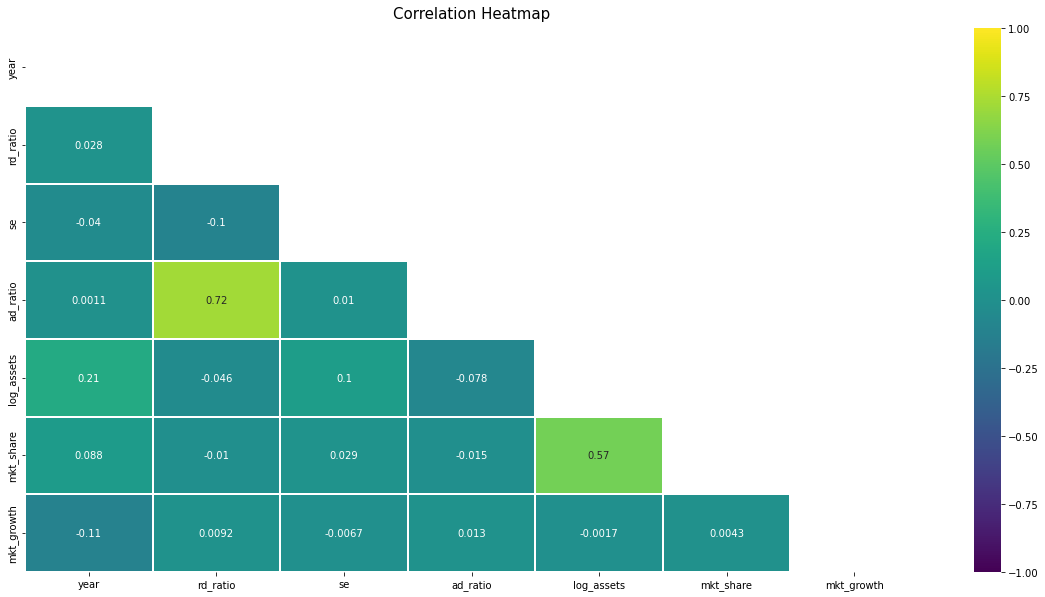

In [136]:
# Create a correlation matrix to check if it is necessary to use PCA.
import seaborn as sn
corr_matrix = data_features.corr()

plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like(corr_matrix))
heatmap = sn.heatmap(corr_matrix, vmin=-1, annot=True, vmax=1, linewidths=0.1, center=0,cmap= 'viridis', mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=10)

#We can notice that rd_ratio shows high correlation (.72) with ad_ratio. log_assets and mkt_share show .57 correlation.

In [137]:
# We now check the variance captured by PCA for different number of components.
from sklearn.decomposition import PCA

for i in range(1, n_features):
    pca = PCA(n_components=i)
    pca.fit_transform(data_features)
    expl_var_ratio = pca.explained_variance_ratio_ 
    print('n. of components:', i, 'explained var. ratio:', expl_var_ratio.sum())
    if expl_var_ratio.sum() >= 0.95:
        break

n. of components: 1 explained var. ratio: 0.4962240167413785
n. of components: 2 explained var. ratio: 0.9580745052710975
